In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

1.15.0
2.3.1


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.callbacks import History

from keras.datasets import imdb

# Zad
Pobierz zbiór danych

IMDB Movie reviews sentiment classification
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

https://keras.io/datasets/

In [4]:
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[:3])

25000 train sequences
25000 test sequences
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194,

# Zad
Ujednolicenie długości ciągów - padding

In [5]:
# Ujednolicenie długości ciągów - padding:
maxlen = 400
X_train = sequence.pad_sequences(x_train,maxlen=maxlen)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(X_train.shape)
print(X_test.shape)

(25000, 400)
(25000, 400)


In [6]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# Zad
Zmniejszmy zbiór danych

In [7]:
n_train = 5000
n_test = 2000
X_train = X_train[:n_train]
y_train = y_train[:n_train]
X_test = X_test[:n_test]
y_test = y_test[:n_test]
print(X_train.shape)
print(X_test.shape)

(5000, 400)
(2000, 400)


The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

* It can be used alone to learn a word embedding that can be saved and used in another model later.
* It can be used as part of a deep learning model where the embedding is learned along with the model itself.
* It can be used to load a pre-trained word embedding model, a type of transfer learning.

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

* **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
* **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
* **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

# Zad
Zwykła sieć rekurencyjna ( z embeddingami)

In [8]:
history = History()
model = Sequential()
model.add(Embedding(max_features, 50, input_length=maxlen)) # wyjscie z warstwy ma wymiar 50
model.add(SimpleRNN(100))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 265,201
Trainable params: 265,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.6926 - accuracy: 0.5205 - val_loss: 0.6899 - val_accuracy: 0.5190
Epoch 2/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.6605 - accuracy: 0.6463 - val_loss: 0.6942 - val_accuracy: 0.5220
Epoch 3/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.6729 - accuracy: 0.5828 - val_loss: 0.6701 - val_accuracy: 0.6040
Epoch 4/100
4000/4000 [==============================] - 10s 3ms/step - loss: 0.6427 - accuracy: 0.6680 - val_loss: 0.6605 - val_accuracy: 0.5750
Epoch 5/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.6097 - accuracy: 0.7128 - val_loss: 0.6395 - val_accuracy: 0.6220
Epoch 6/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.5570 - accuracy: 0.7462 - val_loss: 0.6450 - va

In [10]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 2s 861us/step


[0.986781644821167, 0.7239999771118164]

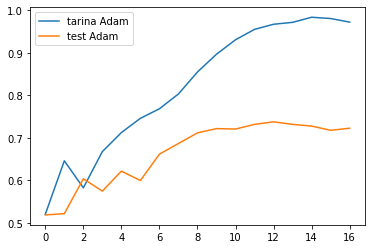

In [11]:

plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad
Proszę dodać
```python
SimpleRNN(100,dropout=0.5)
```

In [ ]:
plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")

plt.plot(history_d.history['accuracy'], label = "tarina Adam")
plt.plot(history_d.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()

# Zad
Sprawdź architekturę dwustronną
```python
Bidirectional(SimpleRNN(10,dropout=0.5))
```

In [ ]:
plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")

plt.plot(history_d.history['accuracy'], label = "tarina Adam")
plt.plot(history_d.history['val_accuracy'], label = "test Adam")

plt.plot(history_d_10.history['accuracy'], label = "tarina Adam")
plt.plot(history_d_10.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()

# Zad
Proszę sprawdzić dwie warstwy:
```python
model.add(SimpleRNN(10,return_sequences=True))
model.add(SimpleRNN(20))
```

In [ ]:
plt.plot(history.history['accuracy'], label = "tarina ")
plt.plot(history.history['val_accuracy'], label = "test ")

plt.plot(history_d.history['accuracy'], label = "tarina  Drop")
plt.plot(history_d.history['val_accuracy'], label = "test Drop")

plt.plot(history_d_10.history['accuracy'], label = "tarina Drop 10")
plt.plot(history_d_10.history['val_accuracy'], label = "test Drop 10")

plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.legend()
plt.show()

# LSTM

In [18]:
from keras.layers import LSTM

history_LSTM = History()
model = Sequential()
model.add(Embedding(max_features, 
                    50,
                   input_length=maxlen,
                   mask_zero=True)) 
# mask_zero sprawia ze siec pomija zera na poczatku
model.add(LSTM(20))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_LSTM, early_stopping])

model.evaluate(X_test,y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 255,701
Trainable params: 255,701
Non-trainable params: 0
_________________________________________________________________
Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 23s 6ms/step - loss: 0.6340 - accuracy: 0.6532 - val_loss: 0.5242 - val_accuracy: 0.7700
Epoch 2/100
4000/4000 [==============================] - 16s 4ms/step - loss: 0.3676 - accuracy: 0.8535 - val_loss: 0.3966 - val_accuracy: 0.8330
Epoch 3/100
4000/4000 [===============

[0.8676849020719528, 0.8004999756813049]

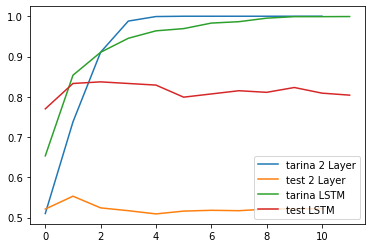

In [19]:
plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.plot(history_LSTM.history['accuracy'], label = "tarina LSTM")
plt.plot(history_LSTM.history['val_accuracy'], label = "test LSTM")

plt.legend()
plt.show()

# GRU

In [ ]:
plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.plot(history_LSTM.history['accuracy'], label = "tarina LSTM")
plt.plot(history_LSTM.history['val_accuracy'], label = "test LSTM")

plt.plot(history_GRU.history['accuracy'], label = "tarina GRU")
plt.plot(history_GRU.history['val_accuracy'], label = "test GRU")

plt.legend()
plt.show()

# Zad

Zbóduj model używający 
```python
Bidirectional LSTM
```

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

https://keras.io/examples/imdb_bidirectional_lstm/

# Zad. 
Zbuduj model używający 
```python
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
```

https://stackoverflow.com/questions/53670332/why-not-use-flatten-followed-by-a-dense-layer-instead-of-timedistributed